![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [52]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import pingouin

women_results = pd.read_csv('women_results.csv')
men_results = pd.read_csv('men_results.csv')
print('Primeras 5 filas de women_results \n')
print(women_results.head())
print('\nPrimeras 5 filas de men_results \n')
print(men_results.head())


Primeras 5 filas de women_results 

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]

Primeras 5 filas de men_results 

   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland

In [53]:
# Se filtran los datos de women_result por fecha apartir del 2002-01-01 y partidos de FIFA World Cup
women_results['date'] = pd.to_datetime(women_results['date'])
fill_women = women_results[(women_results['date']>='2002-01-01')&(women_results['tournament']=='FIFA World Cup')]
print(f'women filtrado\n{fill_women}')

# Se filtran los datos de men_result por fecha apartir del 2002-01-01 y partidos de FIFA World Cup
men_results['date'] = pd.to_datetime(men_results['date'])
fill_men = men_results[(men_results['date']>='2002-01-01')&(men_results['tournament']=='FIFA World Cup')]
print(f'\nmen filtrado\n{fill_men}')

women filtrado
      Unnamed: 0       date  ... away_score      tournament
1600        1600 2003-09-20  ...          3  FIFA World Cup
1601        1601 2003-09-20  ...          0  FIFA World Cup
1602        1602 2003-09-20  ...          1  FIFA World Cup
1603        1603 2003-09-20  ...          0  FIFA World Cup
1604        1604 2003-09-21  ...          1  FIFA World Cup
...          ...        ...  ...        ...             ...
4465        4465 2019-06-29  ...          2  FIFA World Cup
4466        4466 2019-07-02  ...          2  FIFA World Cup
4467        4467 2019-07-03  ...          0  FIFA World Cup
4468        4468 2019-07-06  ...          2  FIFA World Cup
4469        4469 2019-07-07  ...          0  FIFA World Cup

[200 rows x 7 columns]

men filtrado
       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1

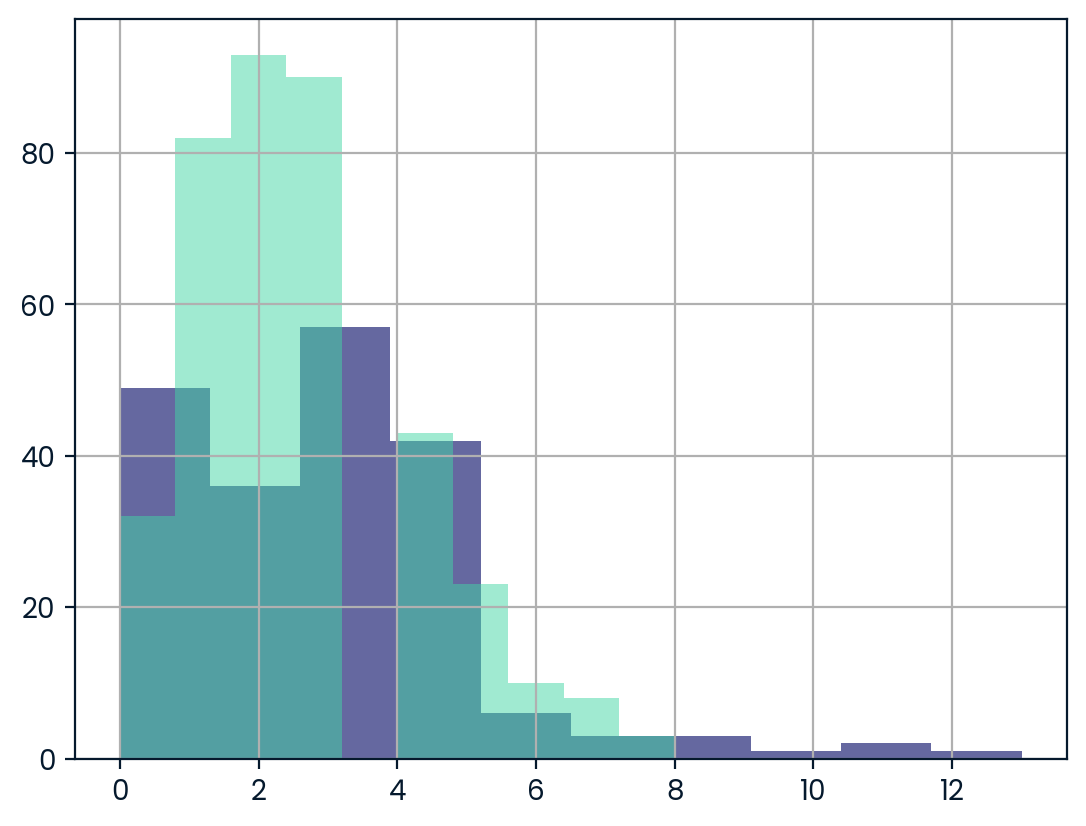

In [54]:
# Se crea el grupo women/men y el total de goles
fill_women['group'] = 'women'
fill_men['group'] = 'men'
fill_women['gol_score'] = fill_women['home_score'] + fill_women['away_score']
fill_men['gol_score'] = fill_men['home_score'] + fill_men['away_score']

#Determinar si tienen una distriducion normal
fill_women['gol_score'].hist()
fill_men['gol_score'].hist(alpha=0.5)
plt.show()


In [55]:
#Unir los dos df en uno
union = pd.concat([fill_women, fill_men], axis=0, ignore_index=True)

#Subsetear apara solo tener el grupo women/men y el gol_score
unionsub = union[['group','gol_score']]
unionsub_piv = unionsub.pivot(columns = 'group', values='gol_score')

#Prueba Wilcoxon-Mann-Whitney con cola a la derecha
result_pg = pingouin.mwu(x=unionsub_piv['women'],
                         y=unionsub_piv['men'],
                         alternative='greater')

#Extraemos el valor de p
p_val = result_pg['p-val'].values[0]

In [56]:
#Creamos el dict con los resultados 
if p_val <= 0.1:
    result = 'reject'
else:
    result = 'fail to reject'

result_dict = {'p_val': p_val, 'result': result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
